<a href="https://colab.research.google.com/github/Psychohistorian11/Fisica_II/blob/master/Clases/Algoritmo_de_Verlet(prueba).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Verlet

El método de Verlet es una técnica numérica, que permite
integrar de forma simple las ecuaciones de movimiento de Newton. Para comenzar partiremos de la ecuación de movimiento unidimensional,esto es :

$$ m\frac{d^{2}x(t)}{dt^2}=\sum F_{x}, \tag{1}$$

donde $\sum F_{x}$, representa la suma de todas las fuerzas actuando sobre  la  partícula  de  masa $m$ a lo largo de la dirección $x$.

Resolver  la  ecuación (1),  significa  encontrar $x(t)$ dadas unas  condiciones iniciales de movimiento -- posición  inicial $x_{0}$ y velocidad inicial $v_{0}--$. Para esto,  tenemos  dos   posibilidades, resolver  analiticamente  la  ecuación  diferencial o hacer  una  aproximación  numéérica para  resolver  con  el computador. En  esta  oportunidad   haremos uso de las series de Taylor para aproximar  la solución a  la  ecuación (1). La  serie de Taylor  esta dada por:

$$x(t \pm \Delta t)=\sum_{n=0}^{\infty}(\pm 1)^{n}\frac{x^{n}(t)\Delta t ^{n}}{n!} \tag{2}$$.

Tomando las series de Taylor para $x(t+\Delta t ) $ y $x(t-\Delta t)$, tenemos :

$$x(t+\Delta t) \approx x(t)+v(t)\Delta t + \frac{1}{2}a(t)\Delta t ^2 + O(\Delta t ^3), \tag{3}$$

$$x(t-\Delta t) \approx x(t)-v(t)\Delta t + \frac{1}{2}a(t)\Delta t ^2 - O(\Delta t ^3), \tag{4}$$

con :

$v(t)=\frac{dx(t)}{dt}$ representando  la  velocidad  de la  particula, $a(t)=\frac{d^2{x(t)}}{dt^2}$ representando  la  aceleración y  $O(\Delta t^3)$ representando  el  orden  de  la  aproximacióón,  es  decir  todos  los  terminos  que  se  cortaron  en  la  serie,  que en  principio  es  una  sema  infinita.

Sumando las ecuaciones  (3)  y (4), obtenemos :

$$x(t+\Delta t)+x(t-\Delta t) \approx 2x(t)+a(t)\Delta^2+O(\Delta t ^4),$$

 despejando $x(t+\Delta t)$,  queda:

$$x(t+\Delta t) \approx 2x(t)-x(t-\Delta t)+a(t)\Delta t ^2. \tag{5}$$

Esta  ecuación  permite  conociendo  la  posición  y  la  aceleración  en un  tiempo  $t$ (presente) y  la  posición  en  el  tiempo $t-\Delta t$ (pasado),  predecir  la   posición  en el  tiempo $t+\Delta t$ (futuro).

Computacionalmente el tiempo lo tenemos discretizado entonces podemos reescribir la ecuación anterior en termino d subincices donde cada subindice indica un instante de tiempo

$$x_{i+1}\approx2x_{i}-x_{i-1}+a_{i}\Delta t ^2. \tag{6}$$

para el  sistema  masa  resorte

$$a_{i}=-\frac{k}{m}x_{i}$$

$$x_{0} $$

$$x_{1}=x_{0}+v_{0}\Delta t$$


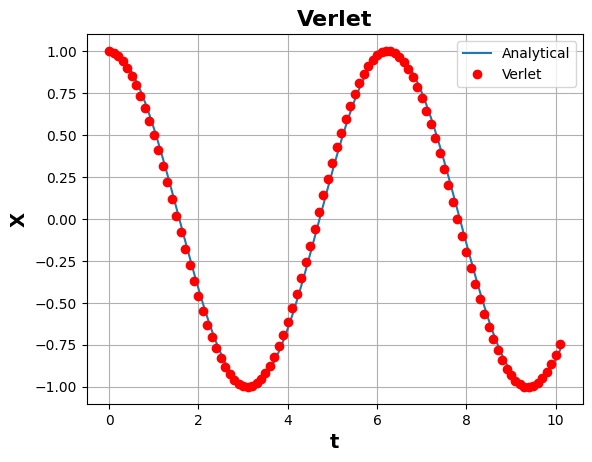

In [6]:
#Verlet algorithm application

"""
The following code is a test carried out by a youtube channel (PyPhy) on the verlet algorithm,
its verbatim copy is based on algorithm learning.
Link of the video: https://www.youtube.com/watch?v=rT6Whl96N4gg
link of the repository: https://github.com/PyPhy/Python/blob/master/Numerical%20Dynamics/Verlet.py


"""

# Constants
from numpy import cos, array

k  = 1  #Spring constant
m  = 1  #mass of the object
dt = 0.1  #Acurracy
tm = 10 # simulation time

# Initial Conditions

x = [1] #Initial position
v = [0] #Initial velocity

#Time
t = [0]

#/--------------------------------
#Algorithm

i = 0
while t[-1] <= tm:

    # Acceleration
    a = -(k/m)* x[i]

    if i == 0:

        # Euler Cromer method

        # Velocity
        v_next = v[i] + a* dt

        # Position
        x_next = x[i] + v_next* dt

    else:

        # Position
        x_next = 2* x[i] - x[i-1] + a* dt**2

    # Position update
    x.append(x_next)

    # Time update
    t.append(t[i] + dt)

    # Loop update
    i = i + 1

#%% Analytical solution

omg = (k/ m)**0.5
xa  = x[0]* cos(omg* array(t))

#%% Plot
import matplotlib.pyplot as plt

plt.plot(t, xa, label = 'Analytical')
plt.plot(t, x, 'ro', label = 'Verlet')
plt.title('Verlet', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('X', fontweight = 'bold', fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()



#Explicación:
Constantes y parámetros iniciales:

- k: Constante del resort.
- m: Masa del objeto.
- dt: Paso de tiempo (precisión) para la simulación.
- tm: Tiempo total de simulación.

#Condiciones iniciales:

* x: Lista que contiene la posición inicial del objeto (en este caso, una lista con un solo valor inicial de 1).
* v: Lista que contiene la velocidad inicial del objeto (en este caso, una lista con un solo valor inicial de 0).
* t: Lista que contiene el tiempo (inicializado con un solo valor de 0).

#Algoritmo de simulación:

* Dentro de un bucle while, el código simula el movimiento del objeto mientras el tiempo real ( t[-1]) sea menor o igual al tiempo total de simulación ( tm).

* Calcula la aceleración del objeto como -k/m * x[i], donde x[i]es la posición actual del objeto en el bucle.

* Luego, utilice el método de Verlet para actualizar la posición y la velocidad del objeto en cada iteración del bucle. En la primera iteración ( i == 0), utilice el método de Euler-Cromer para actualizar la velocidad y la posición.
En las iteraciones siguientes, utilice el método de Verlet para actualizar la posición.

* Actualiza las listas xy tcon los nuevos valores calculados.

* Incrementa el índice ipara la siguiente iteración.

#Solucion analitica:

Calcule la frecuencia angular omgdel oscilador.

* Calcula una solución analítica para la posición en función del tiempo utilizando la ecuación de posición x[0] * cos(omg * array(t)).
Graficar resultados:

* Importa la biblioteca matplotlib.pyplot para realizar gráficos.